In [1]:
!ls

Bulldozers.ipynb


In [2]:
!pwd

/Users/sameenislam/Documents/Repositories/ML-Notebooks/kaggle


In [3]:
!ls ../data

Train.csv Train.zip


In [8]:
!conda env list

# conda environments:
#
base                     /Users/sameenislam/anaconda3
fastai-cpu            *  /Users/sameenislam/anaconda3/envs/fastai-cpu



In [10]:
!pip install fastai==0.7.0

  Using cached fastai-0.7.0-py3-none-any.whl (112 kB)
  Using cached plotnine-0.6.0-py3-none-any.whl (4.1 MB)


  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached mizani-0.6.0-py2.py3-none-any.whl (61 kB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.2.3 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 2.2.3 which is incompatible.


In [12]:
!pip install torchtext==0.2.3

In [4]:
%load_ext autoreload

%autoreload

In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from IPython.display import display
from sklearn import metrics

/Users/sameenislam/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/sameenislam/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
df_raw = pd.read_csv('../data/Train.csv', low_memory=False, parse_dates=['saledate']) 

In [16]:
df_raw.tail().T

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [9]:
df_raw.SalePrice = np.log(df_raw.SalePrice) 

In [11]:
m = RandomForestRegressor(n_jobs=-1) 
m.fit(df_raw.anydrop('SalePrice', axis=1), df_raw.SalePrice) 

ValueError: could not convert string to float: 'Low'

In [15]:
fld = df_raw.saledate
fld.dt.year

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saledate, Length: 401125, dtype: int64

In [16]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head() 

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [20]:
df_raw.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
401120,6333336,9.259131,1840702,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000
401121,6333337,9.305651,1830472,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000
401122,6333338,9.350102,1887659,21439,149,1.0,2005,NaN,NaN,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,11,44,2,2,306,False,False,False,False,False,False,1320192000
401123,6333341,9.104980,1903570,21435,149,2.0,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,10,43,25,1,298,False,False,False,False,False,False,1319500800
401124,6333342,8.955448,1926965,21435,149,2.0,2005,NaN,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2011,10,43,25,1,298,False,False,False,False,False,False,1319500800


In [22]:
m = RandomForestRegressor(n_jobs=-1) 
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice) 

ValueError: could not convert string to float: 'Low'

In [24]:
train_cats(df_raw) 

In [28]:
df_raw['UsageBand'].cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

In [27]:
df_raw['UsageBand'].cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True) 

In [37]:
df_raw.isnull().sum().sort_index()/len(df_raw)

Backhoe_Mounting     0.803872
Blade_Extension      0.937129
Blade_Type           0.800977
Blade_Width          0.937129
Coupler              0.466620
                       ...   
saleIs_year_start    0.000000
saleMonth            0.000000
saleWeek             0.000000
saleYear             0.000000
state                0.000000
Length: 65, dtype: float64

In [6]:
os.makedirs('../data/tmp', exist_ok=True)
df_raw.to_feather('../data/tmp/bulldozers-raw') 

NameError: name 'df_raw' is not defined

In [7]:
# df_raw= pd.read_feather('../data/tmp/bulldozers-raw')

In [8]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [9]:
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False


In [10]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df, y) 

KeyboardInterrupt: 

### Visualisation

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True) 
sns.set_style("whitegrid")

In [18]:
df_raw.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


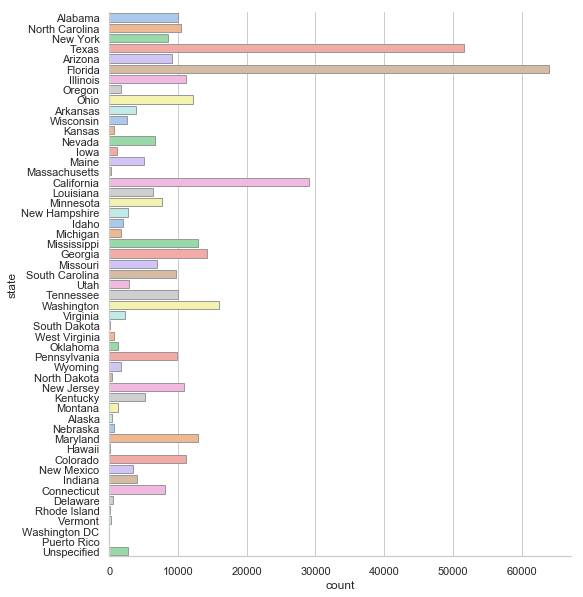

In [27]:
sns.catplot(y="state", kind="count", height=8.27, palette="pastel", edgecolor=".6", data=df_raw) 

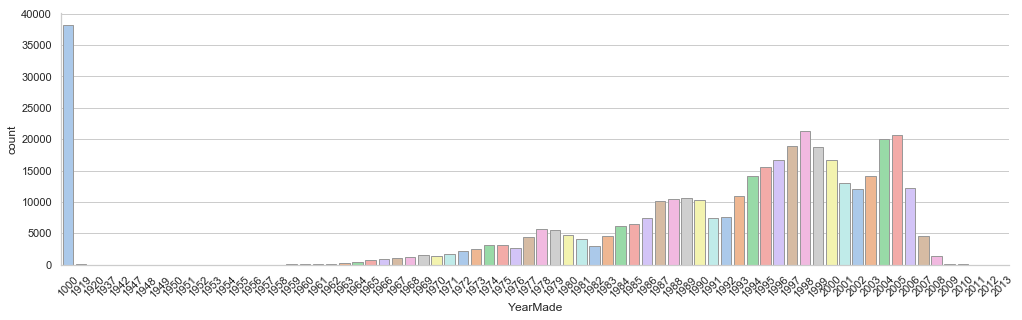

In [44]:
g = sns.catplot(x="YearMade", kind="count", palette="pastel", edgecolor=".6", data=df_raw)
g.fig.set_figwidth(16.7)
g.fig.set_figheight(4.27)
g.set_xticklabels(rotation=45)